# DATA 620 - Assignment 2

We start by preparing data for use in a correlation network.

We import the required packages:

In [413]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
from timeit import default_timer as timer
import networkx

# inline matplotlib
%matplotlib inline

We load an instrument master which maps each equity instrument to instrument characteristics such as security type, sector, industry group, industry, and sub-industry:

In [325]:
instrumentMasterDirectory='D:/marketData/global_monitoring/csi/config/'
instrumentMasterFileName='sp500_csi_wiki'
instrumentMaster=pandas.read_csv(instrumentMasterDirectory+instrumentMasterFileName,sep='|',
    na_values=['nan'],index_col=False)

In [326]:
len(instrumentMaster)

518

In [327]:
instrumentMaster.head()

,instrumentTicker,csiNumber,maxDate,minDate,CSI,Symbol,Exchange,Name,Price Format,Minimum Tick,...,sectorCodeCsi,sectorNameCsi,industryCodeCsi,industryNameCsi,securityTypeCodeCsi,securityTypeNameCsi,gicsSectorName,gicsIndustryGroupName,gicsIndustryName,gicsSubIndustryName
0,A,19267,2017-09-15,1999-11-18,19267,A,NYSE,Agilent Technologies Inc,2,1,...,HC,Healthcare,ML,Medical Laboratories & Research,ORD,Common Stock,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services
1,AAL,69031,2017-09-15,2005-09-27,69031,AAL,NASDAQ(GS),AMERICAN AIRLINES GROUP INC,2,1,...,SE,Services,MA,Major Airlines,ORD,Common Stock,Industrials,Transportation,Airlines,Airlines
2,AAP,19582,2017-09-15,2001-11-29,19582,AAP,NYSE,ADVANCE AUTO PARTS INC,2,1,...,SE,Services,AP,Auto Parts Stores,OTH,Unknown,Consumer Discretionary,Retailing,Specialty Retail,Automotive Retail
3,AAPL,5902,2017-09-15,1985-08-01,5902,AAPL,NASDAQ(GS),Apple Inc,2,1,...,CG,Consumer Goods,EE,Electronic Equipment,ORD,Common Stock,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
4,ABBV,112378,2017-09-15,2013-01-02,112378,ABBV,NYSE,AbbVie Inc,2,1,...,HC,Healthcare,DM,Drug Manufacturers - Major,ORD,Common Stock,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,Biotechnology


In [328]:
instrumentMaster.tail()

,instrumentTicker,csiNumber,maxDate,minDate,CSI,Symbol,Exchange,Name,Price Format,Minimum Tick,...,sectorCodeCsi,sectorNameCsi,industryCodeCsi,industryNameCsi,securityTypeCodeCsi,securityTypeNameCsi,gicsSectorName,gicsIndustryGroupName,gicsIndustryName,gicsSubIndustryName
513,YHOO,15451,2017-05-03,1996-04-12,15451,AABA,NASDAQ(GS),Altaba Inc,2,1,...,TE,Technology,II,Internet Information Providers,ORD,Common Stock,Information Technology,Software & Services,Internet Software & Services,Internet Software & Services
514,YUM,11576,2017-09-15,1997-09-17,11576,YUM,NYSE,YUM! BRANDS INC,2,1,...,SE,Services,RN,Restaurants,ORD,Common Stock,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure",Restaurants
515,ZBH,19543,2017-09-15,2001-07-25,19543,ZBH,NYSE,ZIMMER BIOMET HOLDINGS INC,2,1,...,HC,Healthcare,MA,Medical Appliances & Equipment,ORD,Common Stock,Health Care,Health Care Equipment & Services,Health Care Equipment & Supplies,Health Care Equipment
516,ZION,9976,2017-09-15,1985-08-01,9976,ZION,NASDAQ(GS),Zions Bancorporation,2,1,...,FI,Financial,RP,Regional - Pacific Banks,ORD,Common Stock,Financials,Banks,Banks,Regional Banks
517,ZTS,112701,2017-09-15,2013-02-01,112701,ZTS,NYSE,Zoetis Inc,2,1,...,HC,Healthcare,DG,Drugs - Generic,ORD,Common Stock,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals


Instrument master data was scraped from Wikipedia and mapped to CSI Data instrument identifiers. The data represents a the current S&P500 instrument universe.

We load the price data from the HDF5 file:

In [329]:
# set the HDF5 output file directory
priceDirectory='C:/Users/Derek/Documents/GitHub/DATA_620/Assignments/W3/'
# define the input file name for prices and true range
priceFileName='sp500_wiki_csi.h5'
# read the price data from the HDF5 data store
prices = pandas.read_hdf(priceDirectory+priceFileName,'price')
# reindex
prices=prices.set_index(pandas.to_datetime(prices.index))

Extract the ticker names:

In [330]:
tickers=prices.columns.values

We can see the number of observations available for each ticker using the following operation:

In [331]:
# find the number of observations available for each ticker
numberOfObservations=numpy.sum(prices.isnull()==False,axis=0)
# print the result
print(numberOfObservations)

A       2738
AAL     2738
AAP     2738
AAPL    2738
ABBV    1186
ABC     2738
ABT     2738
ACN     2738
ADBE    2738
ADI     2738
ADM     2738
ADP     2738
ADS     2738
ADSK    2738
AEE     2738
AEP     2738
AES     2738
AET     2738
AFL     2738
AGN     2738
AIG     2738
AIV     2738
AIZ     2738
AJG     2738
AKAM    2738
ALB     2738
ALGN    2738
ALK     2738
ALL     2738
ALLE     964
        ... 
VZ      2738
WAT     2738
WBA     2738
WDC     2738
WEC     2738
WFC     2738
WFM     2725
WHR     2738
WLTW    2737
WM      2738
WMB     2738
WMT     2738
WRK      563
WU      2738
WY      2738
WYN     2738
WYNN    2738
XEC     2738
XEL     2738
XL      2738
XLNX    2738
XOM     2738
XRAY    2738
XRX     2738
XYL     1491
YHOO    2644
YUM     2738
ZBH     2738
ZION    2738
ZTS     1165
Length: 518, dtype: int64


We look at the distribution of the number of observations by ticker:

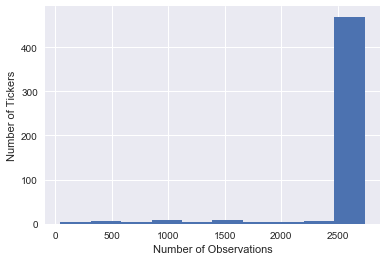

In [332]:
numberOfObservations.hist()
plt.xlabel('Number of Observations')
plt.ylabel('Number of Tickers')

Most of the stocks have 2738 daily periods. For simplicity, we extract only the prices with 2738 days.

In [558]:
# find the single stocks with full samples
fullSampleIndex=numberOfObservations==2738
# extract the prices for the single stocks with full samples
cleanPrices=prices.loc[:,fullSampleIndex]


We compute the log returns:

In [559]:
# log price by instrument
logPrices=numpy.log(cleanPrices)
# first difference to get returns
logReturns=logPrices.diff(periods=1,axis=0)

Display the daily log returns:

In [564]:
logReturns

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-01,0.016180,-0.027450,-0.016120,-0.023969,-0.001271,-0.001896,0.002125,-0.012893,-0.004724,-0.050338,...,0.004155,0.000904,-0.011691,-0.022602,-0.005053,-0.014816,-0.001766,0.000507,-0.002921,-0.013397
2006-11-02,-0.020150,-0.021039,0.052017,-0.002273,-0.018410,0.000843,0.010555,-0.002652,-0.002530,-0.026291,...,-0.004711,-0.007728,0.001004,-0.010076,0.001826,0.031303,-0.011857,-0.002023,0.006664,-0.008990
2006-11-03,-0.014471,-0.001687,-0.008297,-0.008777,-0.018756,0.003791,-0.007225,0.002387,-0.011783,-0.040927,...,0.019530,0.000918,-0.005747,0.012081,0.013396,-0.041412,-0.001790,-0.022998,0.007443,-0.010356
2006-11-06,0.032859,0.054378,0.005539,0.017975,0.008330,-0.003580,0.018268,0.020711,0.019353,-0.000293,...,-0.001635,0.000910,0.017992,0.033834,0.010477,0.016257,0.000599,0.017767,0.026560,0.009897
2006-11-07,-0.011825,0.010728,-0.004429,0.009985,0.001308,0.008186,-0.017967,0.027385,0.018671,-0.020371,...,-0.025421,-0.002739,0.011538,0.024458,-0.005224,0.015043,0.009507,0.005569,-0.000937,0.011571
2006-11-08,0.001186,-0.021570,0.018963,0.023817,-0.004368,-0.012196,0.010219,0.005037,-0.002466,0.063551,...,0.021594,0.009543,-0.003642,0.013126,0.021820,-0.000317,0.004720,-0.003372,-0.007254,0.003028
2006-11-09,0.012106,-0.012597,0.010563,0.010729,-0.017008,-0.030930,-0.002092,-0.003019,-0.017465,0.000838,...,0.006554,0.002262,-0.008743,-0.001491,0.010780,-0.013114,-0.004720,0.002701,-0.013574,-0.000630
2006-11-10,0.007601,0.007941,0.006176,-0.002636,0.005332,0.002831,0.014870,-0.007080,0.010326,-0.008423,...,-0.010944,0.003156,0.007900,0.004467,-0.002550,0.001288,-0.000593,0.023150,0.012494,0.001890
2006-11-13,0.019035,0.044240,-0.003755,0.014691,-0.003331,-0.006984,-0.002659,0.017107,0.002488,-0.011345,...,-0.014985,0.005382,-0.004650,0.014800,0.000134,0.001607,-0.000591,0.001152,0.000541,-0.004668


Display the most recent daily log returns:

In [565]:
logReturns.tail(5)

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
2017-09-11,0.016625,0.050536,0.003927,0.017931,0.022651,0.008232,0.018597,0.009801,0.021887,0.009864,...,0.008408,0.005558,0.049025,0.016357,0.005441,0.013596,0.015719,0.017112,0.000864,0.025840
2017-09-12,0.000454,0.009333,0.029847,-0.003971,-0.005823,-0.003820,-0.000073,-0.003576,-0.000852,0.009768,...,0.009820,-0.019592,-0.002470,0.004317,0.003150,0.003370,0.022819,-0.008131,0.005426,0.013944
2017-09-13,-0.010640,0.015222,0.028782,-0.007551,0.004993,-0.004796,-0.010627,-0.000448,-0.001096,0.001850,...,0.051555,-0.007498,0.004687,0.029857,0.003390,-0.005060,-0.002442,-0.000518,-0.004649,-0.006483
2017-09-14,0.003661,-0.017384,-0.000800,-0.008618,-0.044004,-0.005979,0.000593,-0.008291,0.003406,0.003689,...,0.000375,0.006129,-0.029628,0.012907,0.004004,-0.017398,0.002747,0.000389,0.000863,-0.009101
2017-09-15,0.004254,-0.004122,-0.005112,0.010058,0.011215,0.001353,0.003627,-0.002973,0.018053,0.008936,...,0.000094,-0.000407,0.003307,0.007197,-0.000250,0.020774,-0.005195,-0.025065,-0.004493,0.014429


Plot the daily log price time series for ticker 'A':

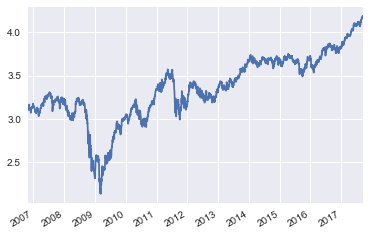

In [566]:
# display the returns
logPrices['A'].plot()

Plot the daily log return for the ticker 'A':

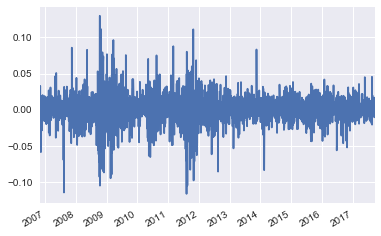

In [567]:
# display the returns
logReturns['A'].plot()

Standardize the returns (i.e., remove the mean and divide by the standard deviation):

In [568]:
# define standardization function
fStandardize=lambda x : x-numpy.mean(x)/numpy.std(x)
# standardize log returns
stdLogReturns=logReturns.apply(fStandardize,axis=1)

Plot the standardized return for ticker 'A':

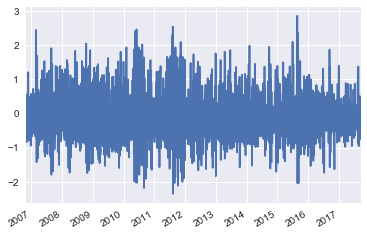

In [569]:
stdLogReturns['A'].plot()

Compute return correlations:

In [570]:
# compute the correlation matrix using d
recentStdLogReturns=stdLogReturns['2012-09-15':]

In [571]:
# define the size of the rolling window in days (roughly 2 years)
lookback=500
# compute the rolling correlations
rollingCorrelation=recentStdLogReturns.rolling(window=lookback,min_periods=lookback).corr(pairwise=True)

In [396]:
rollingCorrelation.tail()

A       AAL       AAP      AAPL      ABBV       ABC  \
2017-09-15 YHOO       NaN       NaN       NaN       NaN       NaN       NaN   
           YUM   0.999464  0.999081  0.998951  0.999443  0.999190  0.999171   
           ZBH   0.999588  0.999133  0.998988  0.999464  0.999420  0.999244   
           ZION  0.999471  0.999182  0.998868  0.999354  0.999157  0.999158   
           ZTS   0.999682  0.999152  0.998965  0.999525  0.999536  0.999408   

                      ABT       ACN      ADBE       ADI    ...         XLNX  \
2017-09-15 YHOO       NaN       NaN       NaN       NaN    ...          NaN   
           YUM   0.999431  0.999528  0.999598  0.999334    ...     0.999411   
           ZBH   0.999635  0.999529  0.999539  0.999368    ...     0.999361   
           ZION  0.999391  0.999430  0.999312  0.999359    ...     0.999320   
           ZTS   0.999653  0.999618  0.999562  0.999447    ...     0.999483   

                      XOM      XRAY       XRX       XYL  YHOO       YUM  \
2017-09-15 YHOO       NaN       NaN       NaN       NaN   NaN       NaN   
           YUM   0.999454  0.999401  0.999121  0.999494   NaN  1.000000   
           ZBH   0.999540  0.999583  0.999228  0.999568   NaN  0.999365   
           ZION  0.999476  0.999368  0.999232  0.999541   NaN  0.999262   
           ZTS   0.999561  0.999582  0.999304  0.999629   NaN  0.999401   

                      ZBH      ZION       ZTS  
2017-09-15 YHOO       NaN       NaN       NaN  
           YUM   0.999365  0.999262  0.999401  
           ZBH   1.000000  0.999317  0.999543  
           ZION  0.999317  1.000000  0.999334  
           ZTS   0.999543  0.999334  1.000000  

[5 rows x 518 columns]

Plot the pairwise 500-day rolling correlation between tickers 'ANDV' and 'VLO':

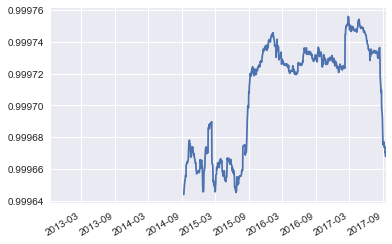

In [397]:
rollingCorrelation.unstack(1)[('ANDV', 'VLO')].plot()

It is important to note that computing 500-day rolling correlations between 457 instruments produces an extremely noisey result. These results are of little use in practice without employing methods to improve the quality of the estimates (using bootstrapping for example). Employing such methods is beyond the scope of this assignment.

Now, we focus on a smaller portion of our instrument universe.

In [401]:
# create energy stock index
energyIndex=instrumentMaster['gicsSectorName']=='Energy'
# extract energy stock tickers
energyTickers=instrumentMaster['instrumentTicker'].loc[energyIndex].values
# display energy tickers
energyTickers

array(['ANDV', 'APA', 'CHK', 'COG', 'CVX', 'CXO', 'DVN', 'EOG', 'EQT',
       'FTI', 'HAL', 'HES', 'HP', 'MPC', 'MRO', 'MUR', 'NBL', 'NFX', 'NOV',
       'OKE', 'OXY', 'PSX', 'PXD', 'RIG', 'RRC', 'SWN', 'VLO', 'XEC', 'XOM'], dtype=object)

Extract standardized returns for energy stocks:

In [408]:
# extract standardized returns for energy stocks
energyStdLogReturns=stdLogReturns[energyTickers]
# display
energyStdLogReturns

,ANDV,APA,CHK,COG,CVX,CXO,DVN,EOG,EQT,FTI,...,OKE,OXY,PSX,PXD,RIG,RRC,SWN,VLO,XEC,XOM
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-01,0.545177,0.526645,0.529959,0.518224,0.544093,NaN,0.541370,0.539677,0.545890,0.518506,...,0.546891,0.533213,NaN,0.539238,0.530131,0.521251,0.534644,0.524565,0.551527,0.542319
2006-11-02,0.034269,0.042263,0.035841,0.047749,0.051631,NaN,0.048601,0.035513,0.048715,0.038246,...,0.031886,0.048429,NaN,0.051422,0.055335,0.033921,0.048960,0.027018,0.034899,0.041437
2006-11-03,0.122426,0.129286,0.118376,0.148869,0.122559,NaN,0.130631,0.126943,0.100770,0.125089,...,0.112694,0.118309,NaN,0.129146,0.141974,0.132441,0.123229,0.133321,0.125703,0.119569
2006-11-06,-0.883820,-0.873803,-0.875269,-0.868550,-0.865353,NaN,-0.875575,-0.881337,-0.871864,-0.869262,...,-0.883308,-0.851240,NaN,-0.875131,-0.858625,-0.868904,-0.881367,-0.868535,-0.879391,-0.867279
2006-11-07,-0.210197,-0.213084,-0.210446,-0.214272,-0.210044,NaN,-0.206687,-0.207255,-0.199848,-0.202293,...,-0.192570,-0.216360,NaN,-0.204340,-0.209077,-0.208345,-0.200985,-0.216557,-0.223062,-0.202865
2006-11-08,-0.219104,-0.227992,-0.209920,-0.214574,-0.224549,NaN,-0.216503,-0.212306,-0.213193,-0.216201,...,-0.229861,-0.205268,NaN,-0.223423,-0.213065,-0.212289,-0.230987,-0.217942,-0.211624,-0.211398
2006-11-09,0.290498,0.292635,0.273661,0.277921,0.283234,NaN,0.297562,0.296156,0.272390,0.271877,...,0.275514,0.274988,NaN,0.274069,0.265292,0.303774,0.294032,0.291610,0.279910,0.284136
2006-11-10,-0.365934,-0.387205,-0.375787,-0.382210,-0.376602,NaN,-0.381183,-0.392770,-0.368370,-0.391067,...,-0.366199,-0.375551,NaN,-0.387555,-0.378980,-0.393947,-0.375376,-0.373015,-0.378101,-0.369707
2006-11-13,-0.236481,-0.263469,-0.258415,-0.226034,-0.242179,NaN,-0.253759,-0.261197,-0.248202,-0.266617,...,-0.256395,-0.263881,NaN,-0.267429,-0.271627,-0.258112,-0.259276,-0.248844,-0.268744,-0.253625


In [411]:
# define the size of the rolling window in days
lookback=250
# compute the rolling correlations
energyCorrelations=energyStdLogReturns.rolling(window=lookback,min_periods=lookback).corr(pairwise=True)

Plot the correlations between the tickers 'ANDV' and 'VLO':

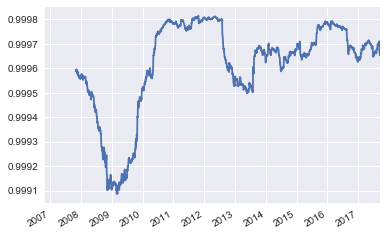

In [414]:
energyCorrelations.unstack(1)[('ANDV', 'VLO')].plot()

#  Correlation Networks

We define a distance metric - which is a function of the correlation between each pair of stocks - as follows (based on G, Caldarelli & A. Chessa [2016, Data Science & Complex Networks, Oxford University Press):

$$d_{i,j}(\Delta t)=\sqrt{2(1-\rho_{i,j}(\Delta t))}$$

This distance metric is used to create our graph below.

In [416]:
nEnergyInstruments=len(energyTickers)
nEnergyInstruments

29

In [424]:
# create correlation graph
G=networkx.Graph()
import math
# number of periods
nPeriods=len(energyCorrelations)
# extract the correlation matrix for the last date ('2017-09-15 00:00:00')
C=energyCorrelations.loc[('2017-09-15 00:00:00', energyTickers)]
# extract the correlation matrix to a numpy array
rho=C.values
# iterate over each instrument
for i in range(0,nEnergyInstruments):
    # define ticker [i]
    iTicker=energyTickers[i]
    # iterate over each instrument
    for j in range(0,nEnergyInstruments):
        # define ticker [j]
        jTicker=energyTickers[j]
        # compute distance
        metricDistance=math.sqrt(2.0*(1.0-round(rho[i,j],10)))
        #
        print(str(iTicker)+"|"+str(jTicker)+"|"+str(metricDistance))
        
        # build network
        G.add_edge(iTicker,jTicker,weight=metricDistance)
        
        

ANDV|ANDV|0.0
ANDV|APA|0.054157193428
ANDV|CHK|0.0729634771649
ANDV|COG|0.056351837592
ANDV|CVX|0.0376303388239
ANDV|CXO|0.0539444936949
ANDV|DVN|0.0619050304903
ANDV|EOG|0.0480365756481
ANDV|EQT|0.0534398297153
ANDV|FTI|0.049394975453
ANDV|HAL|0.0498452384887
ANDV|HES|0.05661203229
ANDV|HP|0.0576781345052
ANDV|MPC|0.0313850760713
ANDV|MRO|0.069602237033
ANDV|MUR|0.0674411506426
ANDV|NBL|0.0548931562219
ANDV|NFX|0.0643161752594
ANDV|NOV|0.0517398395823
ANDV|OKE|0.0472741980366
ANDV|OXY|0.0435555002267
ANDV|PSX|0.030180523521
ANDV|PXD|0.0537905642283
ANDV|RIG|0.0731989207571
ANDV|RRC|0.0653615819882
ANDV|SWN|0.0774922705823
ANDV|VLO|0.0263382763293
ANDV|XEC|0.0510926648356
ANDV|XOM|0.0368357896617
APA|ANDV|0.054157193428
APA|APA|0.0
APA|CHK|0.0543302972567
APA|COG|0.0571668750239
APA|CVX|0.0388282319968
APA|CXO|0.0374682478907
APA|DVN|0.0404894949339
APA|EOG|0.0331404496047
APA|EQT|0.0514961124746
APA|FTI|0.0431095905803
APA|HAL|0.0374517583032
APA|HES|0.0397014961935
APA|HP|0.046588088

We create the visualization of the graph as follows:

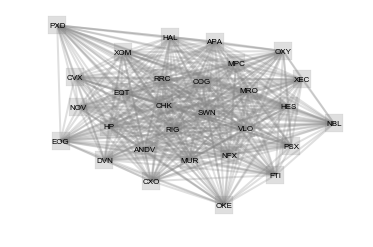

In [436]:
# determine the positions using spring layout
position=networkx.spring_layout(G)
# add notes
networkx.draw_networkx_nodes(G,pos=position, 
    node_color='grey',node_shape='s',alpha=0.25)
# add edges
networkx.draw_networkx_edges(G,pos=position,edge_color='grey',
    alpha=0.25,width=2)
# add labels
networkx.draw_networkx_labels(G,pos=position,font_size=8)
# remove axis
plt.axis('off')
# display the graph
plt.show()

In [437]:
# determine number of nodes
nNodes=G.number_of_nodes()
# display number of nodes
nNodes

435

In [438]:
# determine number of edges
nEdges=G.number_of_edges()
# display number of edges
nEdges

435

Compute the weighted degree:

In [452]:
# compute weighted degree
degreeByInstrument=networkx.degree(G,weight='weight')
# display
degreeByInstrument

{'ANDV': 1.4964570822715935,
 'APA': 1.292874097726017,
 'CHK': 1.726522334675147,
 'COG': 1.6206273854447462,
 'CVX': 1.166845294048521,
 'CXO': 1.2446802190505448,
 'DVN': 1.297847463972157,
 'EOG': 1.105869964410963,
 'EQT': 1.4788347552239243,
 'FTI': 1.2952868354844067,
 'HAL': 1.1812669845224621,
 'HES': 1.302290677995574,
 'HP': 1.3653212233742793,
 'MPC': 1.4134495765049215,
 'MRO': 1.5110657413067012,
 'MUR': 1.4509212184871347,
 'NBL': 1.3145096618812233,
 'NFX': 1.400477841816767,
 'NOV': 1.3291410917902862,
 'OKE': 1.2704120725481958,
 'OXY': 1.181655247574441,
 'PSX': 1.2181345806380375,
 'PXD': 1.3221261841398166,
 'RIG': 1.7293553958353234,
 'RRC': 1.71604110496081,
 'SWN': 2.0226035760385113,
 'VLO': 1.486517562979465,
 'XEC': 1.2284690227035895,
 'XOM': 1.1740011312608798}

Plot the weighted degree:

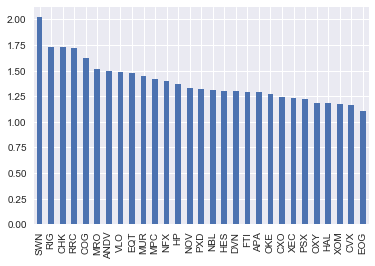

In [466]:
degreeByInstrumentDf=pandas.DataFrame(degreeByInstrument,index=degreeByInstrument.keys()).iloc[0]
degreeByInstrumentDf.sort_values(ascending=False).plot('bar')

Compute the eigenvector centrality as follows:

In [470]:
# compute weighted eigenvector centrality
eigenvectorCentrality = networkx.eigenvector_centrality(G,weight='weight')
# display
eigenvectorCentrality

{'ANDV': 0.1976686117431918,
 'APA': 0.17231780276548686,
 'CHK': 0.2234586503756171,
 'COG': 0.21076404968797727,
 'CVX': 0.15730979054904912,
 'CXO': 0.16682468384901142,
 'DVN': 0.1724794946512594,
 'EOG': 0.1493413295205828,
 'EQT': 0.19336663948537766,
 'FTI': 0.17267301853208494,
 'HAL': 0.15888677719772587,
 'HES': 0.17339657268199923,
 'HP': 0.1813032978804942,
 'MPC': 0.18748340131932312,
 'MRO': 0.19924716246363922,
 'MUR': 0.19159359018541172,
 'NBL': 0.17538726107776206,
 'NFX': 0.18491048255121653,
 'NOV': 0.1766842639827572,
 'OKE': 0.1698430728404243,
 'OXY': 0.15904748416120115,
 'PSX': 0.16323576494526668,
 'PXD': 0.1764163155727935,
 'RIG': 0.22565359229150722,
 'RRC': 0.22094842952736812,
 'SWN': 0.25832583736197257,
 'VLO': 0.19659067101975305,
 'XEC': 0.16451785419056125,
 'XOM': 0.15823342157173856}

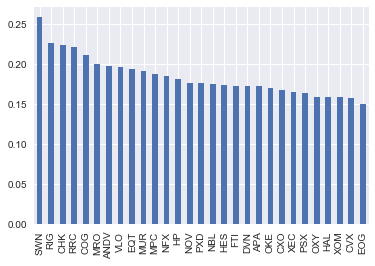

In [472]:
eigenvectorCentralityByInstrumentDf=pandas.DataFrame(eigenvectorCentrality,index=eigenvectorCentrality.keys()).iloc[0]
eigenvectorCentralityByInstrumentDf.sort_values(ascending=False).plot('bar')

Show the top 5 instruments in terms of eigenvector centrality:

In [487]:
eigenvectorCentralityByInstrumentDf.sort_values(ascending=False).head(5)

SWN    0.258326
RIG    0.225654
CHK    0.223459
RRC    0.220948
COG    0.210764
Name: DVN, dtype: float64

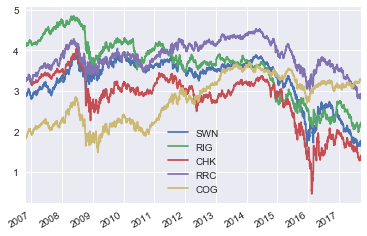

In [493]:
top5EigenvectorCentrality=eigenvectorCentralityByInstrumentDf.sort_values(ascending=False).head(5).index.values

In [537]:
recentStandardizedLogPrices=energyStdLogReturns['2015-09-01':].cumsum(axis=0)

Plotting the log prices without adjusting for differing mean drifts and standard deviations, it appears as though the stocks with larger eigenvector centrality values are moving in a way slightly different from the other energy stocks: 

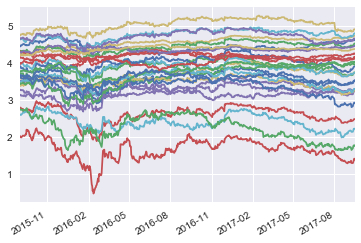

In [538]:
# extract log prices since 2015-09-01
recentLogPrices=logPrices['2015-09-01':]
recentLogPrices[energyTickers].plot(legend=False)

Notice that the energy stocks with the top 5 eigenvector centrality values can be found at the bottom of the graph above (also broken out separately below): 

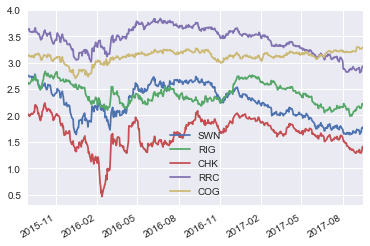

In [533]:
recentLogPrices[top5EigenvectorCentrality].plot()

However, once we create a price index from the standardized returns we see that all of the energy stocks move together.

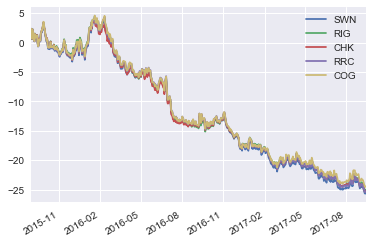

In [539]:
recentStandardizedLogPrices[top5EigenvectorCentrality].plot()

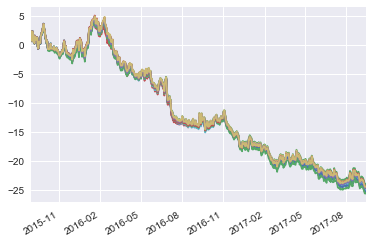

In [542]:
recentStandardizedLogPrices[energyTickers].plot(legend=False)

In the graph above all of the stocks move together once normalized.

Finally, we come the weighted graph diameter. First we compute the  as follows:

In [556]:
#
shortestPaths=networkx.all_pairs_dijkstra_path_length(G,weight='weight')
#
eccentricityByInstrument=networkx.eccentricity(G,sp=shortestPaths)
#
d = networkx.diameter(G, e=eccentricityByInstrument)
# display diameter
d

0.08524599697346483